In [2]:
import pandas as pd

#Etape 1: Analyse exploratoire

##SIRH

In [3]:
file_path_sirh = 'C:\\Users\\j-a-b\\Documents\\OpenClassrooms\\Projet 4 OC\\projet-4-churn-prediction-hr\\data\\extrait_sirh.csv'
df_sirh = pd.read_csv(file_path_sirh)
display(df_sirh)

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,6,4
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,10,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,8,7
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,36,M,2571,Marié(e),Consulting,Consultant,4,80,17,5,2
1466,2062,39,M,9991,Marié(e),Consulting,Manager,4,80,9,7,7
1467,2064,27,M,6142,Marié(e),Consulting,Tech Lead,1,80,6,6,2
1468,2065,49,M,5390,Marié(e),Commercial,Cadre Commercial,2,80,17,9,6


In [4]:
#renommées 'id_employee' by 'ID
df_sirh = df_sirh.rename(columns={'id_employee': 'ID'})

On suprimme la colonne 'nombre_heures_travailless' car 80h = 100%

In [5]:
#Suprimme la colonne 'nombre_heures_travailless'
df_sirh = df_sirh.drop(columns=['nombre_heures_travailless'])

##Evaluation

In [6]:
file_path_eval = 'C:\\Users\\j-a-b\\Documents\\OpenClassrooms\\Projet 4 OC\\projet-4-churn-prediction-hr\\data\\extrait_eval.csv'
df_eval = pd.read_csv(file_path_eval)
display(df_eval)

,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente
0,2,3,2,4,1,1,E_1,3,Oui,11 %
1,3,2,2,2,4,3,E_2,4,Non,23 %
2,4,2,1,3,2,3,E_4,3,Oui,15 %
3,4,3,1,3,3,3,E_5,3,Oui,11 %
4,1,3,1,2,4,3,E_7,3,Non,12 %
...,...,...,...,...,...,...,...,...,...,...
1465,3,4,2,4,3,3,E_2061,3,Non,17 %
1466,4,2,3,1,1,3,E_2062,3,Non,15 %
1467,2,4,2,2,2,3,E_2064,4,Oui,20 %
1468,4,2,2,2,4,2,E_2065,3,Non,14 %


In [7]:
#Changer le nom de 'augementation_salaire_precedente' par '% augementation_salaire_precedente'
df_eval = df_eval.rename(columns={'augementation_salaire_precedente': '% augementation_salaire_precedente'})
#Transformer cette colonne en int64 (enlever '%' de la celulle)
df_eval['% augementation_salaire_precedente'] = df_eval['% augementation_salaire_precedente'].str.replace('%', '').astype('int64')

In [8]:
#In the 'eval_number' column, we extract onlt the number to keep the ID
df_eval['eval_number'] = df_eval['eval_number'].str.extract(r'(\d+)')
df_eval['eval_number'].head()

0    1
1    2
2    4
3    5
4    7
Name: eval_number, dtype: object

In [9]:
#transform "eval_number" to int64
df_eval['eval_number'] = df_eval['eval_number'].astype('int64')

In [10]:
#rename 'eval_number' by 'ID'
df_eval = df_eval.rename(columns={'eval_number': 'ID'})


In [11]:
#Encoder'heure_supplementaires', Oui = 1 et Non = 0
df_eval['heure_supplementaires'] = df_eval['heure_supplementaires'].map({'Oui': 1, 'Non': 0})
#Transformer en int64
df_eval['heure_supplementaires'] = df_eval['heure_supplementaires'].astype('int64')


##Sondage

In [12]:
file_path = 'C:\\Users\\j-a-b\\Documents\\OpenClassrooms\\Projet 4 OC\\projet-4-churn-prediction-hr\\data\\extrait_sondage.csv'
df_sondage = pd.read_csv(file_path)
display(df_sondage)

,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,Oui,0,0,1,1,1,2,Infra & Cloud,Y,Occasionnel,0,5
1,Non,1,3,1,2,8,1,Infra & Cloud,Y,Frequent,1,7
2,Oui,0,3,1,4,2,2,Autre,Y,Occasionnel,0,0
3,Non,0,3,1,5,3,4,Infra & Cloud,Y,Frequent,3,0
4,Non,1,3,1,7,2,1,Transformation Digitale,Y,Occasionnel,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Non,1,3,1,2061,23,2,Transformation Digitale,Y,Frequent,0,3
1466,Non,1,5,1,2062,6,1,Transformation Digitale,Y,Occasionnel,1,7
1467,Non,1,0,1,2064,4,3,Infra & Cloud,Y,Occasionnel,0,3
1468,Non,0,3,1,2065,2,3,Transformation Digitale,Y,Frequent,0,8


In [13]:
#Encoder 'a_quitte_l_entreprise', Oui = 1 et Non = 0
df_sondage['a_quitte_l_entreprise'] = df_sondage['a_quitte_l_entreprise'].map({'Oui': 1, 'Non': 0})
#Transformer en int64
df_sondage['a_quitte_l_entreprise'] = df_sondage['a_quitte_l_entreprise'].astype('int64')

On surprime 'ayant_enfants' du sondage car Yes = 100%

In [14]:
df_sondage = df_sondage.drop(columns=['ayant_enfants'])

In [15]:
#rename 'code_sondage' by 'ID'
df_sondage = df_sondage.rename(columns={'code_sondage': 'ID'})

On suprimme 'nombre_employee_sous_responsabilite' car 1 = 100%

In [16]:
#Drop 'nombre_employee_sous_responsabilite'
df_sondage = df_sondage.drop(columns=['nombre_employee_sous_responsabilite'])

##Join datasets

In [17]:
#Join all datasets by 'ID'
df_merged = pd.merge(df_sirh, df_eval, on='ID', how='inner')
df_merged = pd.merge(df_merged, df_sondage, on='ID', how='inner')

In [47]:
#show all columns of first line
pd.set_option('display.max_columns', None)
display(df_merged.head(1))

,ID,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,note_evaluation_actuelle,heure_supplementaires,% augementation_salaire_precedente,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,distance_domicile_travail,niveau_education,domaine_etude,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,8,6,4,2,3,2,4,1,1,3,1,11,1,0,0,1,2,Infra & Cloud,Occasionnel,0,5


#Etape 2: Données pour la modelisation

##Correlation

In [18]:
import numpy as np

In [19]:
#creation d'une liste pour Valeurs numeriques dans df_merged
# Variables numériques

numeric_features = df_merged.select_dtypes(include=[np.number]).columns.tolist()

In [20]:
#drop ID
if 'ID' in numeric_features:
    numeric_features.remove('ID')

In [21]:
# Retirer la cible
if 'a_quitte_l_entreprise' in numeric_features:
    numeric_features.remove('a_quitte_l_entreprise')

In [22]:
# Variables catégorique
categorical_features = df_merged.select_dtypes(include=['object']).columns.tolist()

In [23]:
print(f"Variables NUMÉRIQUES ({len(numeric_features)}):")
print(numeric_features)

print(f"Variables CATÉGORIQUE ({len(categorical_features)}):")
print(categorical_features)

Variables NUMÉRIQUES (21):
['age', 'revenu_mensuel', 'nombre_experiences_precedentes', 'annee_experience_totale', 'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel', 'satisfaction_employee_environnement', 'note_evaluation_precedente', 'niveau_hierarchique_poste', 'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe', 'satisfaction_employee_equilibre_pro_perso', 'note_evaluation_actuelle', 'heure_supplementaires', '% augementation_salaire_precedente', 'nombre_participation_pee', 'nb_formations_suivies', 'distance_domicile_travail', 'niveau_education', 'annees_depuis_la_derniere_promotion', 'annes_sous_responsable_actuel']
Variables CATÉGORIQUE (6):
['genre', 'statut_marital', 'departement', 'poste', 'domaine_etude', 'frequence_deplacement']


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

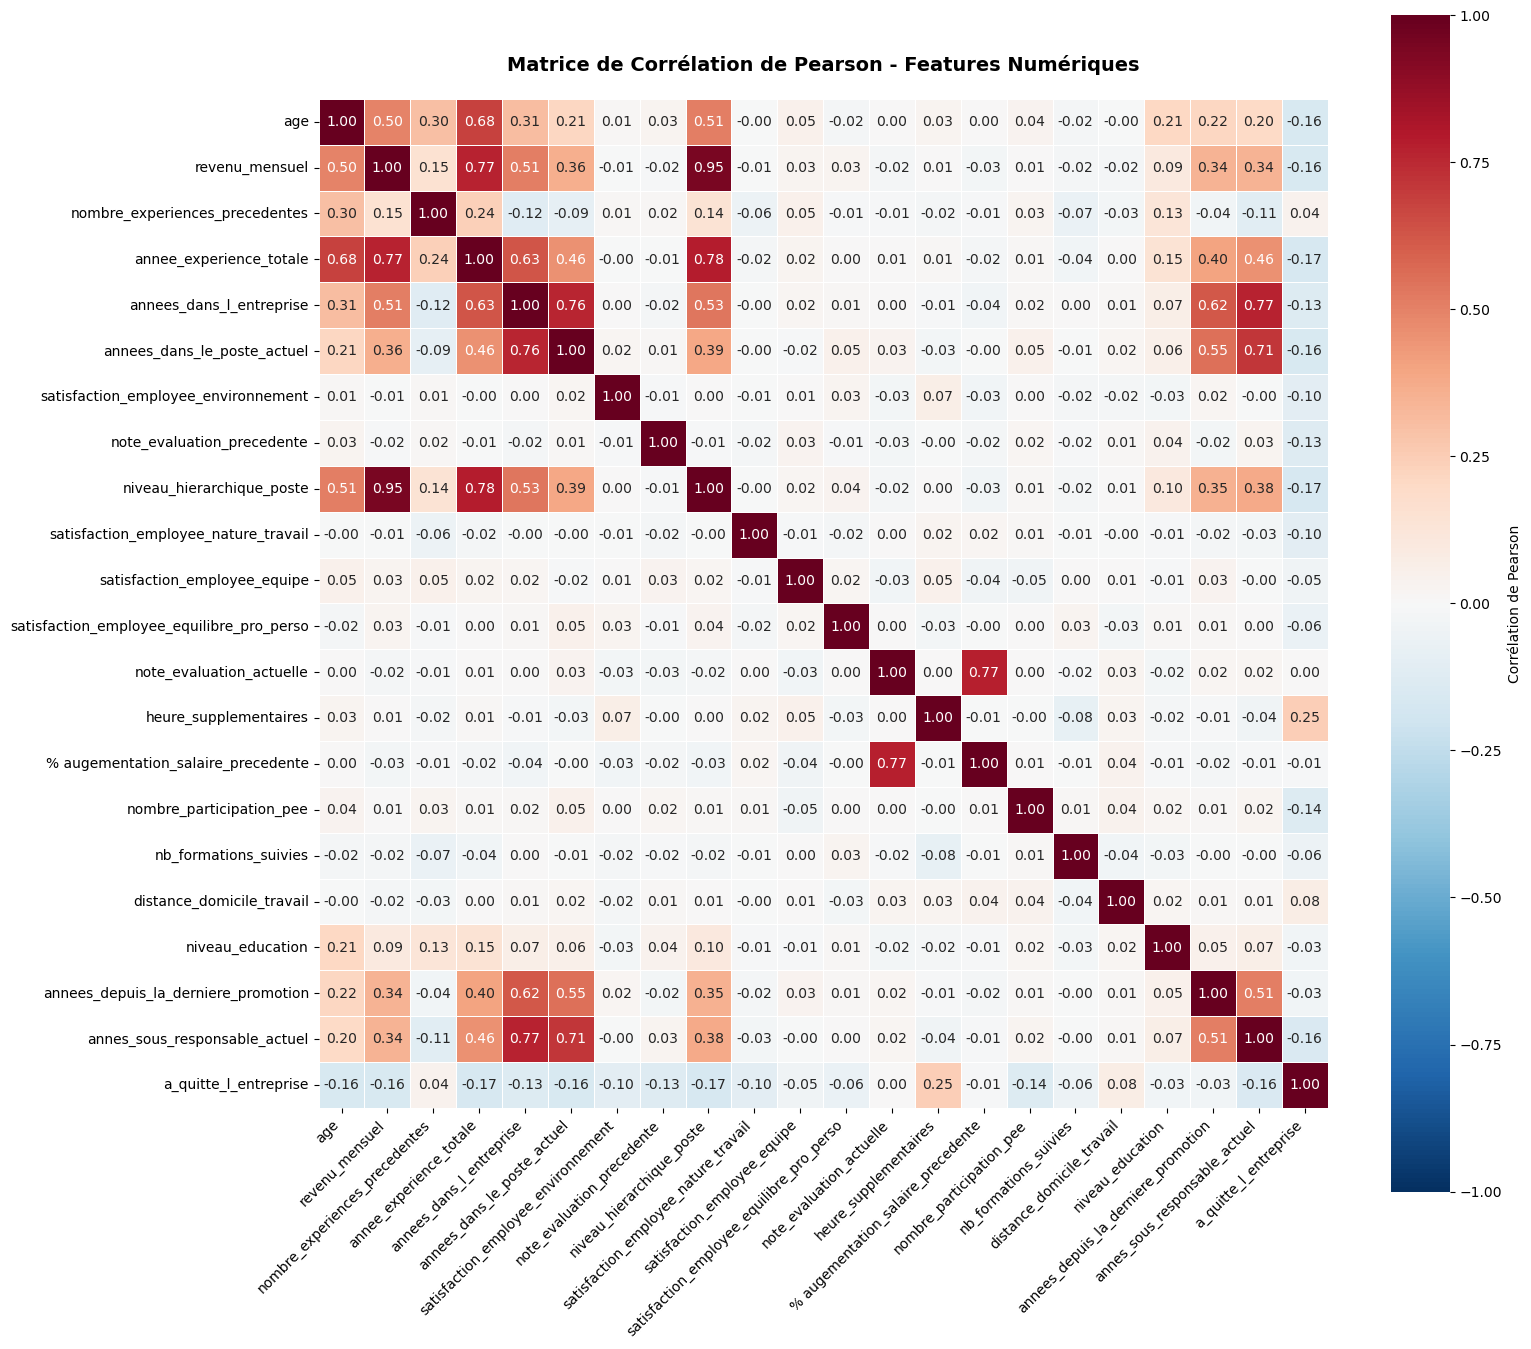

In [25]:
# Calculer la matrice de corrélation de Pearson
corr_pearson = df_merged[numeric_features + ['a_quitte_l_entreprise']].corr()

# Visualiser la matrice
fig, ax = plt.subplots(figsize=(16, 14))
sns.heatmap(corr_pearson, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            ax=ax, cbar_kws={'label': 'Corrélation de Pearson'},
            vmin=-1, vmax=1, square=True, linewidths=0.5)
ax.set_title('Matrice de Corrélation de Pearson - Features Numériques',
             fontweight='bold', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [26]:
# 3️ IDENTIFIER LES FORTES CORRÉLATIONS À ÉLIMINER

print("-"*70)
print("3. IDENTIFICATION DES FORTES CORRÉLATIONS (|r| > 0.7)")
print("-"*70)

# Fonction pour trouver les paires fortement corrélées
def find_high_correlations(corr_matrix, threshold=0.7):
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append({
                    'Feature 1': corr_matrix.columns[i],
                    'Feature 2': corr_matrix.columns[j],
                    'Corrélation': corr_matrix.iloc[i, j]
                })
    return pd.DataFrame(high_corr_pairs).sort_values('Corrélation',
                                                      key=abs, ascending=False)

high_corr_df = find_high_correlations(corr_pearson, threshold=0.7)

if len(high_corr_df) > 0:
    print("ALERTE Paires fortement corrélées (|r| > 0.7):")
    print(high_corr_df.to_string(index=False))
else:
    print("Aucune corrélation fortement linéaire (|r| > 0.7) détectée!")

----------------------------------------------------------------------
3. IDENTIFICATION DES FORTES CORRÉLATIONS (|r| > 0.7)
----------------------------------------------------------------------
ALERTE Paires fortement corrélées (|r| > 0.7):
                  Feature 1                          Feature 2  Corrélation
             revenu_mensuel          niveau_hierarchique_poste     0.950300
    annee_experience_totale          niveau_hierarchique_poste     0.782208
   note_evaluation_actuelle % augementation_salaire_precedente     0.773550
             revenu_mensuel            annee_experience_totale     0.772893
   annees_dans_l_entreprise      annes_sous_responsable_actuel     0.769212
   annees_dans_l_entreprise        annees_dans_le_poste_actuel     0.758754
annees_dans_le_poste_actuel      annes_sous_responsable_actuel     0.714365


4. MATRICE DE CORRÉLATION DE SPEARMAN (Dépendances Monotones)


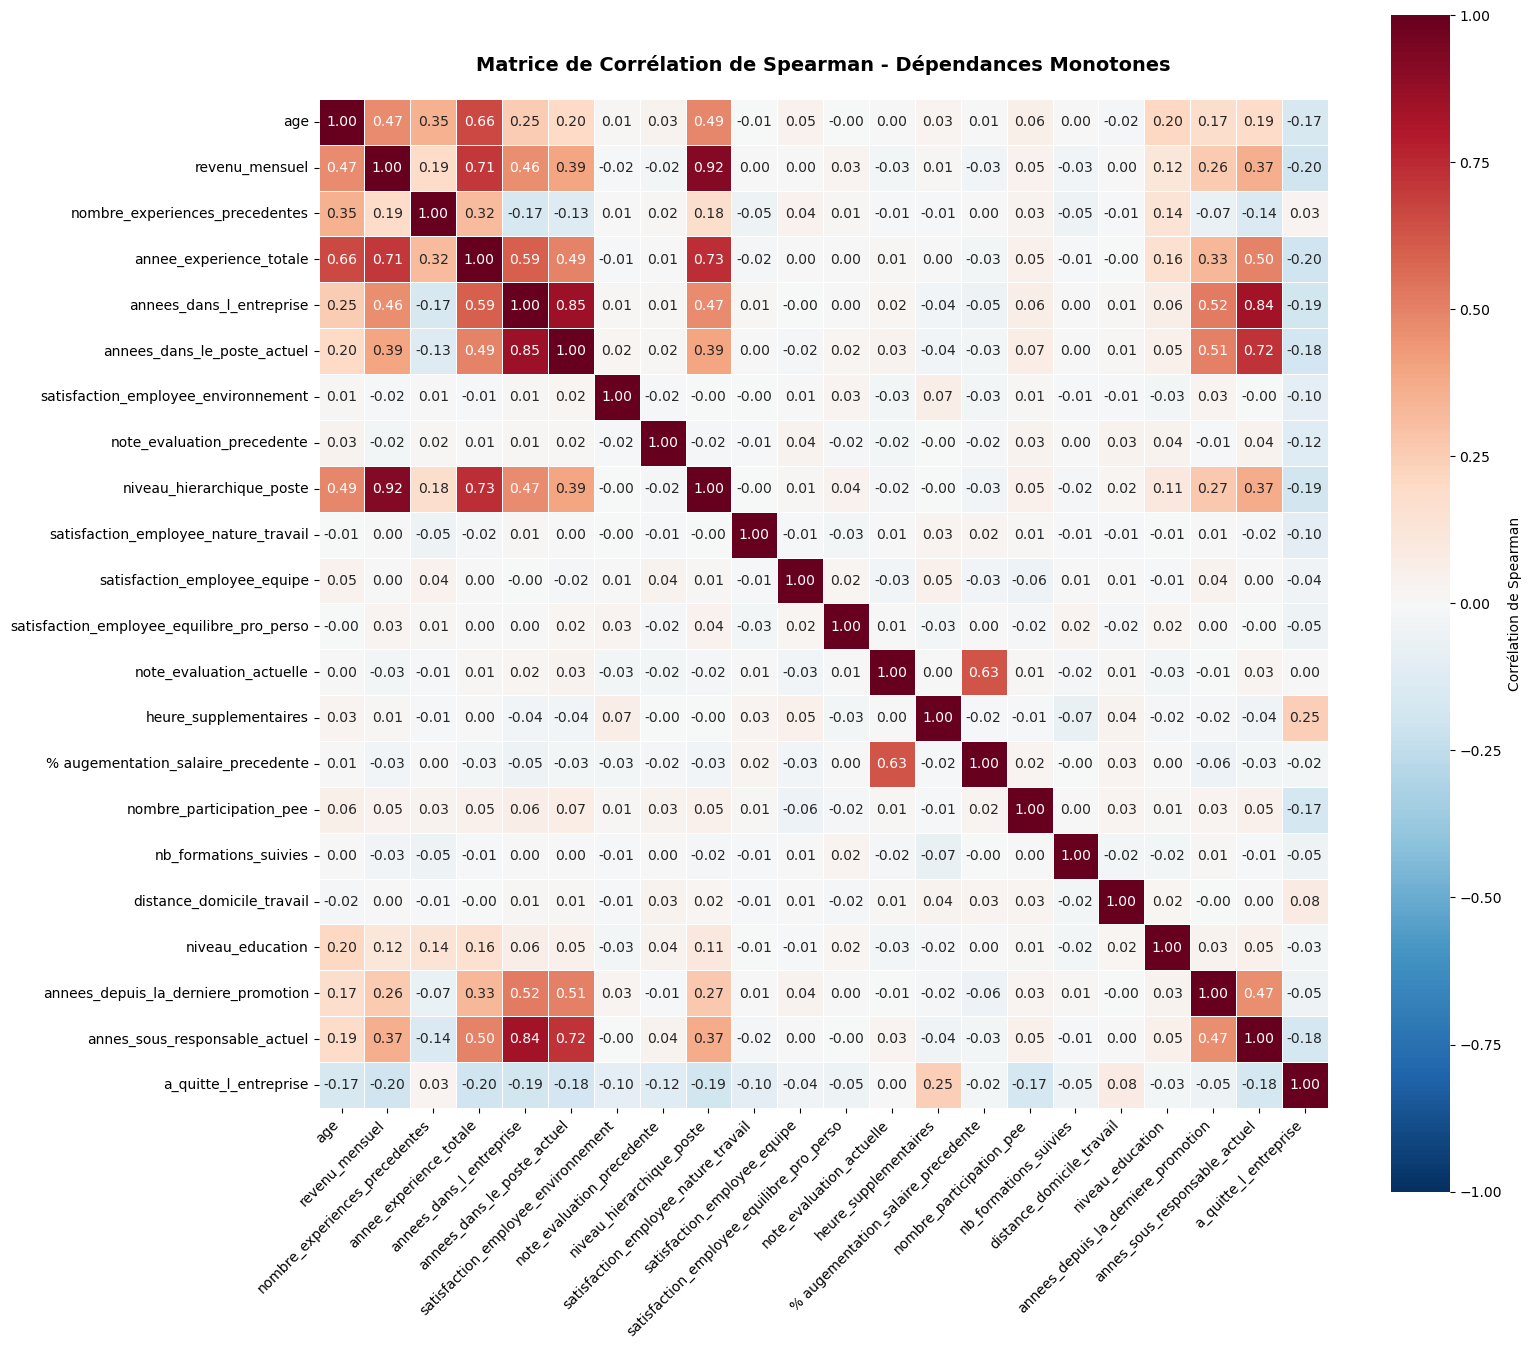

In [27]:
#MATRICE DE CORRÉLATION DE SPEARMAN
# ============================================================

print("="*70)
print("4. MATRICE DE CORRÉLATION DE SPEARMAN (Dépendances Monotones)")
print("="*70)

# Calculer la matrice de corrélation de Spearman
from scipy.stats import spearmanr

# Construire la matrice manuellement pour Spearman
cols = numeric_features + ['a_quitte_l_entreprise']
spearman_corr = pd.DataFrame(np.zeros((len(cols), len(cols))),
                              columns=cols, index=cols)

for i, col1 in enumerate(cols):
    for j, col2 in enumerate(cols):
        if i <= j:
            # Calculer Spearman
            rho, _ = spearmanr(df_merged[col1].dropna(), df_merged[col2].dropna())
            spearman_corr.iloc[i, j] = rho
            spearman_corr.iloc[j, i] = rho

# Visualiser la matrice de Spearman
fig, ax = plt.subplots(figsize=(16, 14))
sns.heatmap(spearman_corr, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            ax=ax, cbar_kws={'label': 'Corrélation de Spearman'},
            vmin=-1, vmax=1, square=True, linewidths=0.5)
ax.set_title('Matrice de Corrélation de Spearman - Dépendances Monotones',
             fontweight='bold', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Encodage des variables

In [28]:
# ============================================================
# 7️ STRATÉGIE D'ENCODING DES VARIABLES CATÉGORIQUE
# ============================================================

print("="*70)
print("7. ANALYSE DES VARIABLES CATÉGORIQUE - STRATÉGIE D'ENCODING")
print("="*70)

encoding_strategy = {}

# Analyser chaque variable catégorique
for col in categorical_features:
    n_unique = df_merged[col].nunique()

    print(f"{col.upper()}")
    print(f"   Nombre de catégories: {n_unique}")
    print(f"   Valeurs: {df_merged[col].unique()}")

    # Calculer le turnover par catégorie
    turnover_by_cat = df_merged.groupby(col)['a_quitte_l_entreprise'].agg(['sum', 'count', 'mean'])
    turnover_by_cat.columns = ['Partis', 'Total', 'Taux Turnover']
    turnover_by_cat['Taux Turnover'] = (turnover_by_cat['Taux Turnover'] * 100).round(2)

    print(f"\n   Turnover par catégorie:")
    print(f"   {turnover_by_cat.to_string()}")

    # Décider de la stratégie d'encoding
    if n_unique == 2:
        strategy = "Binary Encoding (0/1)"
        print(f"Stratégie: {strategy}")
        encoding_strategy[col] = 'binary'

    elif col in ['departement', 'poste']:  # Variables nominales avec ordre hiérarchique
        strategy = "One-Hot Encoding (hiérarchie métier)"
        print(f"Stratégie: {strategy}")
        encoding_strategy[col] = 'onehot'

    elif col == 'domaine_etude':  # Variable nominale sans ordre
        strategy = "One-Hot Encoding (ou Target Encoding)"
        print(f" Stratégie: {strategy}")
        encoding_strategy[col] = 'onehot'

    elif n_unique <= 5:
        strategy = "Ordinal Encoding ou One-Hot (peu de catégories)"
        print(f"Stratégie: {strategy}")
        encoding_strategy[col] = 'onehot'

    else:
        strategy = "Target Encoding (nombreuses catégories)"
        print(f"Stratégie: {strategy}")
        encoding_strategy[col] = 'target'

7. ANALYSE DES VARIABLES CATÉGORIQUE - STRATÉGIE D'ENCODING
GENRE
   Nombre de catégories: 2
   Valeurs: ['F' 'M']

   Turnover par catégorie:
          Partis  Total  Taux Turnover
genre                              
F          87    588          14.80
M         150    882          17.01
Stratégie: Binary Encoding (0/1)
STATUT_MARITAL
   Nombre de catégories: 3
   Valeurs: ['Célibataire' 'Marié(e)' 'Divorcé(e)']

   Turnover par catégorie:
                   Partis  Total  Taux Turnover
statut_marital                              
Célibataire        120    470          25.53
Divorcé(e)          33    327          10.09
Marié(e)            84    673          12.48
Stratégie: Ordinal Encoding ou One-Hot (peu de catégories)
DEPARTEMENT
   Nombre de catégories: 3
   Valeurs: ['Commercial' 'Consulting' 'Ressources Humaines']

   Turnover par catégorie:
                        Partis  Total  Taux Turnover
departement                                      
Commercial               92    446  

In [29]:
# ============================================================
# 8️ APPLIQUER L'ENCODING
# ============================================================

print("="*70)
print("8. APPLICATION DE L'ENCODING")
print("="*70)

df_encoded = df_merged.copy()

8. APPLICATION DE L'ENCODING


In [30]:
# 1️ BINARY ENCODING (Oui/Non -> 1/0)
binary_cols = ['genre', 'statut_marital', 'ayant_enfants', 'heure_supplementaires']

print(f"BINARY ENCODING:")
for col in binary_cols:
    if col in df_encoded.columns:
        # Trouver les valeurs uniques
        unique_vals = df_encoded[col].unique()
        print(f"   {col}: {unique_vals}")

# Genre
df_encoded['genre'] = (df_encoded['genre'] == 'M').astype(int)
print(f"   {col} encodé (M=1, F=0)")

# Statut marital - Créer variable binaire Marié(e) vs autres
df_encoded['est_marie'] = (df_encoded['statut_marital'] == 'Marié(e)').astype(int)
print(f"    statut_marital → est_marie (Marié=1, Autres=0)")
df_encoded.drop('statut_marital', axis=1, inplace=True)

# Ayant enfants et heure_supplementaires sont déjà binaires
print(f"    ayant_enfants et heure_supplementaires sont déjà en 0/1")

BINARY ENCODING:
   genre: ['F' 'M']
   statut_marital: ['Célibataire' 'Marié(e)' 'Divorcé(e)']
   heure_supplementaires: [1 0]
   heure_supplementaires encodé (M=1, F=0)
    statut_marital → est_marie (Marié=1, Autres=0)
    ayant_enfants et heure_supplementaires sont déjà en 0/1


In [31]:
# 2️ ONE-HOT ENCODING (Nominales sans ordre)
onehot_cols = ['departement', 'domaine_etude']

print(f" ONE-HOT ENCODING:")
for col in onehot_cols:
    if col in df_encoded.columns:
        n_cats = df_encoded[col].nunique()
        print(f"   {col}: {n_cats} catégories")

        # One-hot encoding
        onehot = pd.get_dummies(df_encoded[col], prefix=col, drop_first=True)
        df_encoded = pd.concat([df_encoded, onehot], axis=1)
        df_encoded.drop(col, axis=1, inplace=True)
        print(f"   ✅ {col} one-hot encodé → {list(onehot.columns)}")

 ONE-HOT ENCODING:
   departement: 3 catégories
   ✅ departement one-hot encodé → ['departement_Consulting', 'departement_Ressources Humaines']
   domaine_etude: 6 catégories
   ✅ domaine_etude one-hot encodé → ['domaine_etude_Entrepreunariat', 'domaine_etude_Infra & Cloud', 'domaine_etude_Marketing', 'domaine_etude_Ressources Humaines', 'domaine_etude_Transformation Digitale']


In [32]:
# 3️ ORDINAL ENCODING (Hiérarchiques: poste)

print(f"ORDINAL ENCODING (Hiérarchique):")

# Définir l'ordre hiérarchique des postes
poste_order = {
    'Consultant': 1,
    'Assistant de Direction': 2,
    'Tech Lead': 3,
    'Manager': 4,
    'Cadre Commercial': 5,
    'Représentant Commercial': 6,
    'Directeur Technique': 7,
    'Senior Manager': 8,
    'Ressources Humaines': 4  # Équivalent Manager
}

print(f"   poste - Ordre hiérarchique:")
for poste, level in sorted(poste_order.items(), key=lambda x: x[1]):
    print(f"      {poste}: {level}")

df_encoded['poste_level'] = df_encoded['poste'].map(poste_order)
df_encoded.drop('poste', axis=1, inplace=True)
print(f"    poste → poste_level (ordinal)")

ORDINAL ENCODING (Hiérarchique):
   poste - Ordre hiérarchique:
      Consultant: 1
      Assistant de Direction: 2
      Tech Lead: 3
      Manager: 4
      Ressources Humaines: 4
      Cadre Commercial: 5
      Représentant Commercial: 6
      Directeur Technique: 7
      Senior Manager: 8
    poste → poste_level (ordinal)


In [33]:
# 4️ ORDINAL ENCODING (Fréquence de déplacement)

if 'frequence_deplacement' in df_encoded.columns:
    print(f"\n🔹 ORDINAL ENCODING (Ordinale: Fréquence):")

    freq_order = {
        'Aucun': 0,
        'Occasionnel': 1,
        'Frequent': 2
    }

    print(f"   frequence_deplacement - Ordre:")
    for freq, level in sorted(freq_order.items(), key=lambda x: x[1]):
        print(f"      {freq}: {level}")

    df_encoded['freq_deplacement_level'] = df_encoded['frequence_deplacement'].map(freq_order)
    df_encoded.drop('frequence_deplacement', axis=1, inplace=True)
    print(f"   frequence_deplacement → freq_deplacement_level (ordinal)")


🔹 ORDINAL ENCODING (Ordinale: Fréquence):
   frequence_deplacement - Ordre:
      Aucun: 0
      Occasionnel: 1
      Frequent: 2
   frequence_deplacement → freq_deplacement_level (ordinal)


In [34]:
# 5️ ORDINAL ENCODING (Niveau d'éducation)

if 'niveau_education' in df_encoded.columns:
    print(f"ORDINAL ENCODING (Ordinale: Niveau d'Éducation):")

    education_order = {
        1: 1,  # Bac
        2: 2,  # Bac+2
        3: 3,  # Bac+3/+4
        4: 4,  # Master
        5: 5   # Doctorat
    }

    print(f"   niveau_education - Ordre:")
    for edu, level in sorted(education_order.items(), key=lambda x: x[1]):
        print(f"      Niveau {edu}: {level}")

    # C'est déjà numérique, on peut le garder
    print(f"   Niveau_education conservé (déjà ordinal)")

ORDINAL ENCODING (Ordinale: Niveau d'Éducation):
   niveau_education - Ordre:
      Niveau 1: 1
      Niveau 2: 2
      Niveau 3: 3
      Niveau 4: 4
      Niveau 5: 5
   Niveau_education conservé (déjà ordinal)


In [35]:
# Retirer les colonnes d'ID et code sondage
cols_to_drop = ['ID', 'id_employee', 'eval_number', 'code_sondage', 'nombre_heures_travailless']
for col in cols_to_drop:
    if col in df_encoded.columns:
        df_encoded.drop(col, axis=1, inplace=True)

display(f"Shape final: {df_encoded.shape}")
display(f" Colonnes finales ({len(df_encoded.columns)}):")
display(df_encoded.columns.tolist())

'Shape final: (1470, 33)'

' Colonnes finales (33):'

['age',
 'genre',
 'revenu_mensuel',
 'nombre_experiences_precedentes',
 'annee_experience_totale',
 'annees_dans_l_entreprise',
 'annees_dans_le_poste_actuel',
 'satisfaction_employee_environnement',
 'note_evaluation_precedente',
 'niveau_hierarchique_poste',
 'satisfaction_employee_nature_travail',
 'satisfaction_employee_equipe',
 'satisfaction_employee_equilibre_pro_perso',
 'note_evaluation_actuelle',
 'heure_supplementaires',
 '% augementation_salaire_precedente',
 'a_quitte_l_entreprise',
 'nombre_participation_pee',
 'nb_formations_suivies',
 'distance_domicile_travail',
 'niveau_education',
 'annees_depuis_la_derniere_promotion',
 'annes_sous_responsable_actuel',
 'est_marie',
 'departement_Consulting',
 'departement_Ressources Humaines',
 'domaine_etude_Entrepreunariat',
 'domaine_etude_Infra & Cloud',
 'domaine_etude_Marketing',
 'domaine_etude_Ressources Humaines',
 'domaine_etude_Transformation Digitale',
 'poste_level',
 'freq_deplacement_level']

## Featuring engeenering

In [36]:
# SECCIÓN 3: FEATURE ENGINEERING
# ============================================

df_fe = df_encoded.copy()

# 20+ features nuevos
df_fe['ratio_exp_entreprise'] = df_fe['annee_experience_totale'] / (df_fe['annees_dans_l_entreprise'] + 1)
#df_fe['ratio_exp_poste'] = df_fe['annees_dans_le_poste_actuel'] / (df_fe['annee_experience_totale'] + 1)
#df_fe['senior_age'] = (df_fe['age'] > 45).astype(int)
#df_fe['senior_exp'] = (df_fe['annee_experience_totale'] > 15).astype(int)
#df_fe['anciennete_longue'] = (df_fe['annees_dans_l_entreprise'] > 8).astype(int)
#df_fe['revenu_par_exp'] = df_fe['revenu_mensuel'] / (df_fe['annee_experience_totale'] + 1)
df_fe['revenu_par_age'] = df_fe['revenu_mensuel'] / (df_fe['age'] + 1)
#df_fe['perf_alta'] = (df_fe['note_evaluation_actuelle'] >= 4.0).astype(int)
#df_fe['exp_cuadrado'] = df_fe['annee_experience_totale'] ** 2
#df_fe['revenu_log'] = np.log1p(df_fe['revenu_mensuel'])
df_fe['age_group'] = pd.cut(df_fe['age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=[0, 1, 2, 3, 4, 5]).astype(int)
df_fe['satisfaccion_media'] = df_fe[['satisfaction_employee_environnement', 'satisfaction_employee_nature_travail',
                                      'satisfaction_employee_equipe', 'satisfaction_employee_equilibre_pro_perso']].mean(axis=1)

print(f"Features ingenierie: +{df_fe.shape[1] - df_encoded.shape[1]} neufs")

Features ingenierie: +4 neufs


In [37]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 37 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        1470 non-null   int64  
 1   genre                                      1470 non-null   int64  
 2   revenu_mensuel                             1470 non-null   int64  
 3   nombre_experiences_precedentes             1470 non-null   int64  
 4   annee_experience_totale                    1470 non-null   int64  
 5   annees_dans_l_entreprise                   1470 non-null   int64  
 6   annees_dans_le_poste_actuel                1470 non-null   int64  
 7   satisfaction_employee_environnement        1470 non-null   int64  
 8   note_evaluation_precedente                 1470 non-null   int64  
 9   niveau_hierarchique_poste                  1470 non-null   int64  
 10  satisfaction_employee_na

##Modelisation X et Y

In [38]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, roc_auc_score, f1_score,
                             precision_score, recall_score, confusion_matrix,
                             classification_report, roc_curve, auc)

#Etape 4: Amelioration de l'approche de classification (gestion de classes)

In [39]:
# ========================================
# PREPARE DATA - VERSION AMÉLIORÉE
# ========================================
print("Préparation données améliorée pour modélisation...")

X = df_fe.drop(['a_quitte_l_entreprise'], axis=1)
y = df_fe['a_quitte_l_entreprise']

# 1. SPLIT STRATIFIÉ (✅ DÉJÀ PARFAIT)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. ROBUSTSCALER (✅ DÉJÀ PARFAIT)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔥 AJOUT 1: VÉRIFICATION PROPORTIONS
print(f"Total: {len(y)} | Train: {len(y_train)} | Test: {len(y_test)}")
print(f"Train Oui: {(y_train == 1).sum()}/{len(y_train)} ({y_train.mean():.1%})")
print(f"Test Oui: {(y_test == 1).sum()}/{len(y_test)} ({y_test.mean():.1%})")
print("✅ Proportions préservées!")

# 🔥 AJOUT 2: SMOTE SEULEMENT SUR TRAIN (ratio 1:2 doux)
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # 1 positif pour 2 négatifs
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f"SMOTE Train: {X_train_smote.shape[0]} | Oui: {y_train_smote.mean():.1%}")

# 🔥 AJOUT 3: STRATIFIED K-FOLD pour validation future
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print("✅ K-Fold 5 prêt pour validation croisée")

# 🔥 AJOUT 4: TIMESERIES SPLIT (si données temporelles)
try:
    # Si colonne date disponible (optionnel)
    if 'date_embauche' in X.columns:
        from sklearn.model_selection import TimeSeriesSplit
        tscv = TimeSeriesSplit(n_splits=5)
        print("✅ TimeSeriesSplit activé")
    else:
        print("ℹ️ Pas de colonne date → K-Fold standard")
except:
    pass

# VARIABLES PRÊTES POUR MODÉLISATION
print("\n📦 Données prêtes:")
print("- X_train_scaled, y_train (original)")
print("- X_train_smote, y_train_smote (équilibré)")
print("- X_test_scaled, y_test")
print("- skf (pour cross-validation)")
print("🚀 Prêt pour modélisation!")


Préparation données améliorée pour modélisation...
Total: 1470 | Train: 1176 | Test: 294
Train Oui: 190/1176 (16.2%)
Test Oui: 47/294 (16.0%)
✅ Proportions préservées!
SMOTE Train: 1479 | Oui: 33.3%
✅ K-Fold 5 prêt pour validation croisée
ℹ️ Pas de colonne date → K-Fold standard

📦 Données prêtes:
- X_train_scaled, y_train (original)
- X_train_smote, y_train_smote (équilibré)
- X_test_scaled, y_test
- skf (pour cross-validation)
🚀 Prêt pour modélisation!


In [40]:
# ========================================
# MODÈLE LINÉAIRE OPTIMISÉ (Logistic Regression)
# ============================================================
print("="*80)
print("STEP 3: MODÈLE LINÉAIRE OPTIMISÉ (Logistic Regression)")
print("="*80)

print("Entraînement Régression Logistique optimisée...")

from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Modèle optimisé
lr_model_opt = LogisticRegression(
    max_iter=1000,
    random_state=42,
    class_weight='balanced',
    C=0.1,                    # Régularisation L2
    solver='liblinear'        # Optimisé petits datasets
)

lr_model_opt.fit(X_train_scaled, y_train)

# Prédictions baseline (seuil 0.5)
y_pred_lr_train = lr_model_opt.predict(X_train_scaled)
y_pred_lr_test = lr_model_opt.predict(X_test_scaled)
y_proba_lr_train = lr_model_opt.predict_proba(X_train_scaled)[:, 1]
y_proba_lr_test = lr_model_opt.predict_proba(X_test_scaled)[:, 1]

# 🔥 SEUIL OPTIMAL (MAX F1)
precision_curve_lr, recall_curve_lr, seuils_lr = precision_recall_curve(y_test, y_proba_lr_test)
f1_scores_lr = 2 * precision_curve_lr * recall_curve_lr / (precision_curve_lr + recall_curve_lr)
meilleur_seuil_lr = seuils_lr[np.argmax(f1_scores_lr)]

# Prédictions OPTIMISÉES (seuil optimal) ← TOUTES les variables _opt
y_pred_lr_train_opt = (y_proba_lr_train >= meilleur_seuil_lr).astype(int)
y_pred_lr_test_opt = (y_proba_lr_test >= meilleur_seuil_lr).astype(int)

# ========================================
# MÉTRIQUES OPTIMISÉES → VARIABLES _opt
# ========================================
# TRAIN OPTIMISÉ
lr_acc_train_opt = accuracy_score(y_train, y_pred_lr_train_opt)
lr_recall_train_opt = recall_score(y_train, y_pred_lr_train_opt)
lr_precision_train_opt = precision_score(y_train, y_pred_lr_train_opt, zero_division=0)
lr_f1_train_opt = f1_score(y_train, y_pred_lr_train_opt)
lr_roc_auc_train_opt = roc_auc_score(y_train, y_proba_lr_train)

# TEST OPTIMISÉ
lr_acc_test_opt = accuracy_score(y_test, y_pred_lr_test_opt)
lr_recall_test_opt = recall_score(y_test, y_pred_lr_test_opt)
lr_precision_test_opt = precision_score(y_test, y_pred_lr_test_opt, zero_division=0)
lr_f1_test_opt = f1_score(y_test, y_pred_lr_test_opt)
lr_roc_auc_test_opt = roc_auc_score(y_test, y_proba_lr_test)

# MATRICE OPTIMISÉE
lr_cm_opt = confusion_matrix(y_test, y_pred_lr_test_opt)
lr_tn_opt, lr_fp_opt, lr_fn_opt, lr_tp_opt = lr_cm_opt.ravel()

# Overfitting gap OPTIMISÉ
lr_overfitting_gap_opt = abs(lr_acc_train_opt - lr_acc_test_opt)

# AFFICHAGE
print(f"\nLOGISTIC _OPT (Seuil optimal {meilleur_seuil_lr:.3f}):")
print(f"  ENTRAÎNEMENT _opt:")
print(f"     Acc: {lr_acc_train_opt:.4f} | Rappel: {lr_recall_train_opt:.4f} | F1: {lr_f1_train_opt:.4f}")
print(f"  TEST _opt:")
print(f"     Acc: {lr_acc_test_opt:.4f} | Rappel: {lr_recall_test_opt:.4f} | F1: {lr_f1_test_opt:.4f}")
print(f"     ROC-AUC: {lr_roc_auc_test_opt:.4f}")

print(f"MATRICE _opt:")
print(f"  TN: {lr_tn_opt} | FP: {lr_fp_opt}")
print(f"  FN: {lr_fn_opt} | TP: {lr_tp_opt}")

print(f"\nRAPPORT _opt:")
print(classification_report(y_test, y_pred_lr_test_opt,
                          target_names=['Retained', 'Departed']))

print(f"OVERFITTING _opt: Gap = {lr_overfitting_gap_opt:.4f}")
print(f"  {'✅ PARFAIT' if lr_overfitting_gap_opt < 0.05 else '⚠️ ATTENTION'}")

# TOUTES VARIABLES _opt PRÊTES POUR COMPARAISON
print(f"\Variables _opt sauvées:")
print("- lr_acc_test_opt, lr_recall_test_opt, lr_f1_test_opt")
print("- lr_cm_opt, lr_fn_opt")
print("- lr_model_opt (modèle optimisé)")
print("- meilleur_seuil_lr")

STEP 3: MODÈLE LINÉAIRE OPTIMISÉ (Logistic Regression)
Entraînement Régression Logistique optimisée...

LOGISTIC _OPT (Seuil optimal 0.591):
  ENTRAÎNEMENT _opt:
     Acc: 0.8291 | Rappel: 0.7158 | F1: 0.5751
  TEST _opt:
     Acc: 0.8503 | Rappel: 0.6596 | F1: 0.5849
     ROC-AUC: 0.8306
MATRICE _opt:
  TN: 219 | FP: 28
  FN: 16 | TP: 31

RAPPORT _opt:
              precision    recall  f1-score   support

    Retained       0.93      0.89      0.91       247
    Departed       0.53      0.66      0.58        47

    accuracy                           0.85       294
   macro avg       0.73      0.77      0.75       294
weighted avg       0.87      0.85      0.86       294

OVERFITTING _opt: Gap = 0.0213
  ✅ PARFAIT
\Variables _opt sauvées:
- lr_acc_test_opt, lr_recall_test_opt, lr_f1_test_opt
- lr_cm_opt, lr_fn_opt
- lr_model_opt (modèle optimisé)
- meilleur_seuil_lr


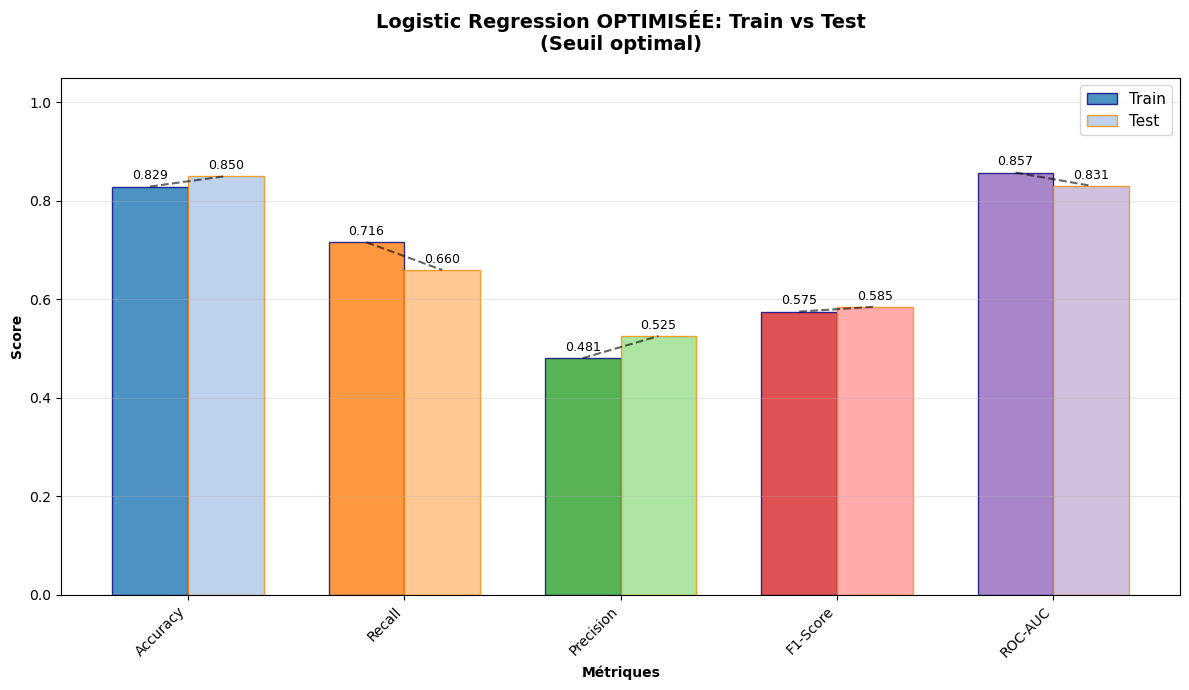

📊 Graphique sauvé: logreg_metrics_optimisee.png


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# DataFrame étendu avec ROC-AUC
metrics_data = {
    'Métrique': ['Accuracy', 'Recall', 'Precision', 'F1-Score', 'ROC-AUC'],
    'Train': [lr_acc_train_opt, lr_recall_train_opt, lr_precision_train_opt, lr_f1_train_opt, lr_roc_auc_train_opt],
    'Test': [lr_acc_test_opt, lr_recall_test_opt, lr_precision_test_opt, lr_f1_test_opt, lr_roc_auc_test_opt]
}
df_metrics = pd.DataFrame(metrics_data)

# Graphique amélioré
fig, ax = plt.subplots(figsize=(12, 7))
x = np.arange(len(df_metrics))
width = 0.35

# Barres avec couleurs différenciées
colors_train = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
colors_test = ['#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5']

bars1 = ax.bar(x - width/2, df_metrics['Train'], width, label='Train',
               alpha=0.8, color=colors_train, edgecolor='navy')
bars2 = ax.bar(x + width/2, df_metrics['Test'], width, label='Test',
               alpha=0.8, color=colors_test, edgecolor='darkorange')

# Valeurs sur barres
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

ax.set_xlabel('Métriques', fontweight='bold')
ax.set_ylabel('Score', fontweight='bold')
ax.set_title('Logistic Regression OPTIMISÉE: Train vs Test\n(Seuil optimal)',
             fontweight='bold', fontsize=14, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(df_metrics['Métrique'], rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0, 1.05)

# Lignes overfitting gap
for i, row in df_metrics.iterrows():
    ax.plot([i-width/2, i+width/2], [row['Train'], row['Test']],
            'k--', alpha=0.6, linewidth=1.5)

plt.tight_layout()
plt.savefig('logreg_metrics_optimisee.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Graphique sauvé: logreg_metrics_optimisee.png")


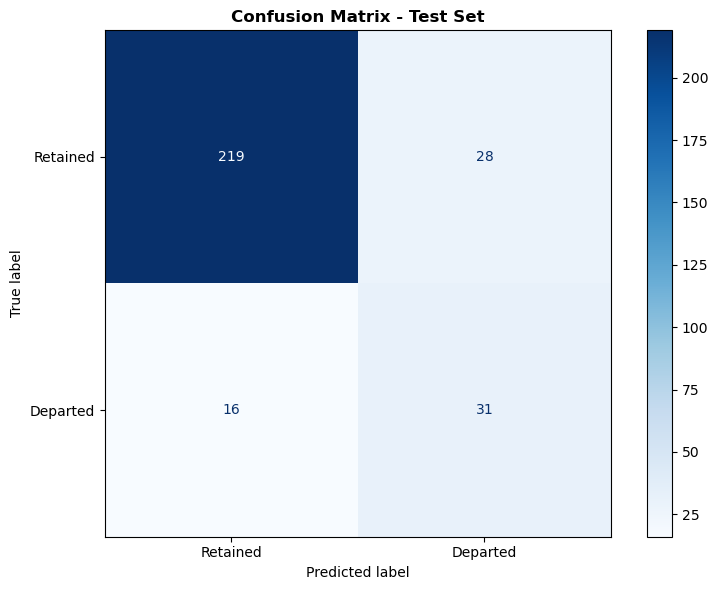

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm_opt, display_labels=['Retained', 'Departed'])
disp.plot(ax=ax, cmap='Blues', values_format='.0f')
plt.title('Confusion Matrix - Test Set', fontweight='bold')
plt.tight_layout()
plt.show()


In [43]:
# ========================================
# 🚀 SAUVEGARDE MODÈLE FINAL (LogisticRegression OPTIMISÉ) 
# ========================================
import joblib
import os

# Créer dossier models/
os.makedirs("models", exist_ok=True)

# 1. Modèle LR optimisé (le meilleur !)
joblib.dump(lr_model_opt, "models/lr_model_opt.pkl")
print("✅ Modèle LR optimisé → models/lr_model_opt.pkl")

# 2. Scaler (obligatoire pour HF Spaces)
joblib.dump(scaler, "models/scaler.pkl")  # scaler de X_train_scaled
print("✅ Scaler → models/scaler.pkl")

# 3. Seuil optimal (pour prédictions)
joblib.dump({'meilleur_seuil_lr': meilleur_seuil_lr}, "models/seuil_opt.pkl")
print("✅ Seuil optimal → models/seuil_opt.pkl")

print("\n🎉 TOUT PRÊT POUR HF SPACES !")
print("Dossier models/ : lr_model_opt.pkl + scaler.pkl + seuil_opt.pkl")


✅ Modèle LR optimisé → models/lr_model_opt.pkl
✅ Scaler → models/scaler.pkl
✅ Seuil optimal → models/seuil_opt.pkl

🎉 TOUT PRÊT POUR HF SPACES !
Dossier models/ : lr_model_opt.pkl + scaler.pkl + seuil_opt.pkl
